<a href="https://colab.research.google.com/github/yogipi/Classification-of-Pneumonia-and-COVID-19-Using-Deep-Residual-Network/blob/main/ResNet34_CLAHE_RMSprop_0.0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install tensorflow version 2
%tensorflow_version 2.x
!pip install imutils
!pip install image-classifiers==1.0.0b1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os
import PIL
from datetime import datetime
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import gc
from google.colab import files
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adamax, Nadam, Adagrad
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers as Layers
from tensorflow.keras.layers import Dropout,ZeroPadding2D, Add, GlobalAveragePooling2D, DepthwiseConv2D, Activation, BatchNormalization, Dropout, LSTM, ConvLSTM2D, AveragePooling2D, Flatten, Dense, Input,Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation, LSTM, ConvLSTM2D, Lambda, Reshape
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from skimage.segmentation import mark_boundaries
from sklearn.metrics import precision_recall_curve,  plot_precision_recall_curve,  classification_report,  confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from imutils import paths

# Data Visualization & Preprocessing

In [ ]:
# dataset_path = './out'
# log_path = './logs'

In [ ]:
# %%bash
# rm -rf out
# mkdir -p out
# mkdir -p logs

In [ ]:
base_dir = '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input'
!ls "/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input"

COVID-19  Normal  Pneumonia


In [ ]:
# from skimage import exposure
# from glob import glob

# start = 0   # Starting index of images
# num_img = 1110 # Total number of images to show
# other_dir = '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_resize/COVID-19'


# # fig, ax = plt.subplots(nrows=1, ncols=num_img, figsize=(num_img*10,10))
# for q, file_path in enumerate(glob('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input/COVID-19/*.png')[start:start+num_img]):
#     src_img = cv2.imread(file_path,0)

#     img_resize = cv2.resize(src_img,(224,224),3)
#     img_clr = cv2.cvtColor(img_resize, cv2.COLOR_GRAY2RGB)

#     cv2.imwrite(f'{other_dir}/resize_COVID-19_{q}.jpg',img_resize)
    
#     # ax[q].imshow(img_clr)

In [ ]:
# from skimage import exposure
# from glob import glob

# start = 0   # Starting index of images
# num_img = 1110 # Total number of images to show
# other_dir = '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_resize/Normal'


# # fig, ax = plt.subplots(nrows=1, ncols=num_img, figsize=(num_img*10,10))
# for q, file_path in enumerate(glob('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input/Normal/*.jpeg')[start:start+num_img]):
#     src_img = cv2.imread(file_path,0)

#     img_resize = cv2.resize(src_img,(224,224),3)
#     img_clr = cv2.cvtColor(img_resize, cv2.COLOR_GRAY2RGB)

#     cv2.imwrite(f'{other_dir}/resize_Normal_{q}.jpg',img_resize)
  
#     # ax[q].imshow(img_clr)

In [ ]:
# from skimage import exposure
# from glob import glob

# start = 0   # Starting index of images
# num_img = 1110 # Total number of images to show
# other_dir = '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_resize/Pneumonia'


# # fig, ax = plt.subplots(nrows=1, ncols=num_img, figsize=(num_img*10,10))
# for q, file_path in enumerate(glob('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input/Pneumonia/*.jpeg')[start:start+num_img]):
#     src_img = cv2.imread(file_path,0)
    
#     img_resize = cv2.resize(src_img,(224,224),3)
#     img_clr = cv2.cvtColor(img_resize, cv2.COLOR_GRAY2RGB)
  
#     cv2.imwrite(f'{other_dir}/resize_Pneumonia_{q}.jpg',img_resize)
    
#     # ax[q].imshow(img_clr)

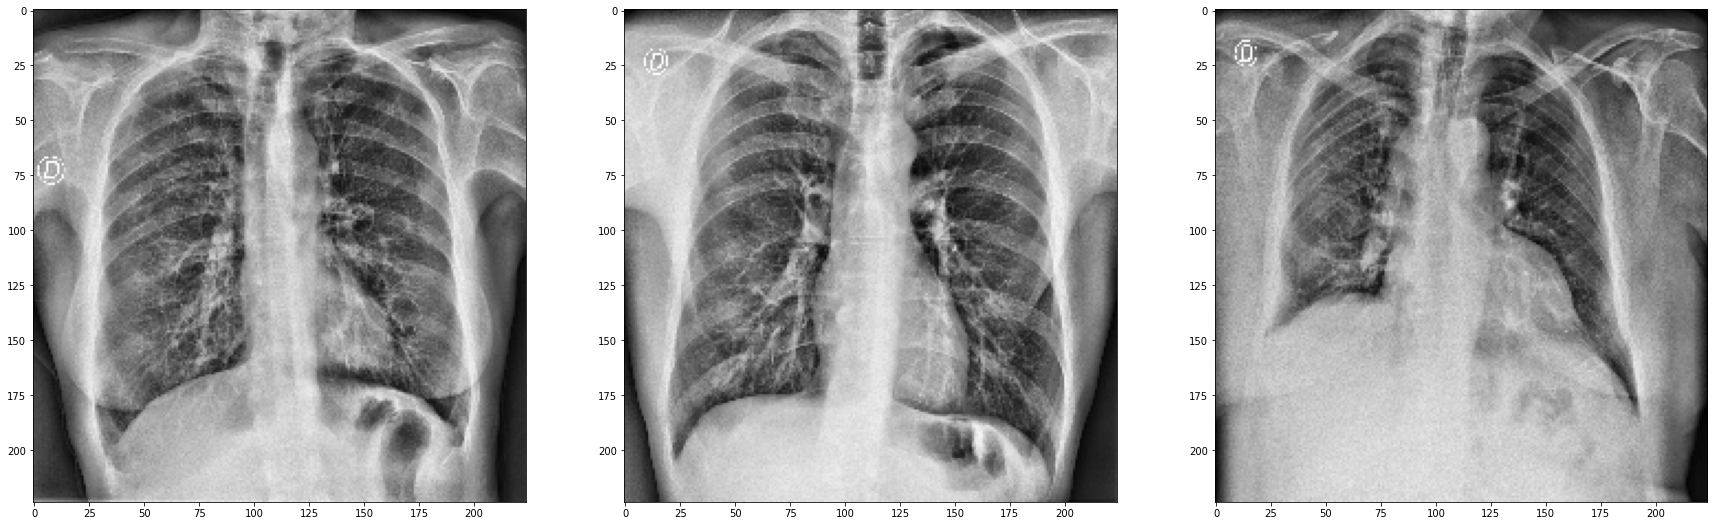

In [ ]:
from skimage import exposure
from glob import glob

start = 0   # Starting index of images
num_img = 3 # Total number of images to show
other_dir = '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_clahe/COVID-19'

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(16, 16))

fig, ax = plt.subplots(nrows=1, ncols=num_img, figsize=(num_img*10,10))
for q, file_path in enumerate(glob('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input/COVID-19/*')[start:start+num_img]):
    src_img = cv2.imread(file_path,0)
    img_clahe = clahe.apply(src_img)
    img_resize = cv2.resize(img_clahe,(224,224))

    img_clahe = cv2.cvtColor(img_resize, cv2.COLOR_GRAY2RGB )

    # cv2.imwrite(f'{other_dir}/clahe_COVID-19_{q}.jpg',img_clahe)
    
    ax[q].imshow(img_clahe)

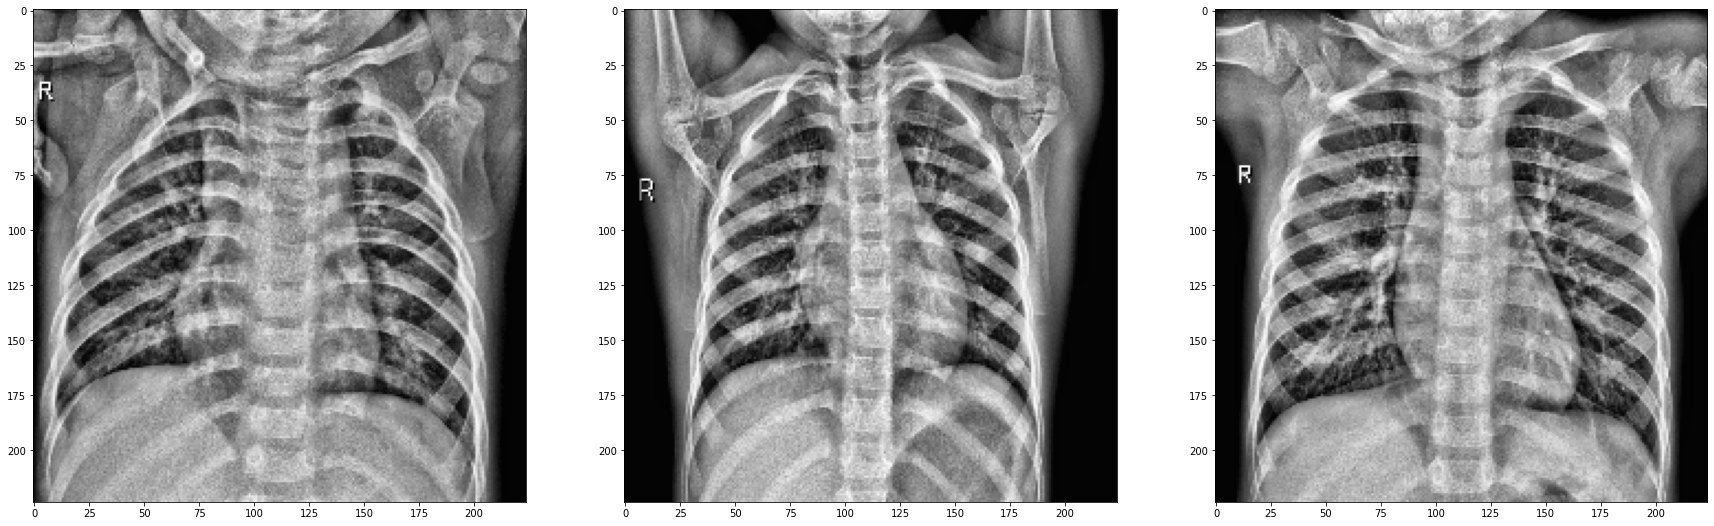

In [ ]:
from skimage import exposure
from glob import glob

start = 0   # Starting index of images
num_img = 3 # Total number of images to show
other_dir = '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_clahe/Normal'

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(16, 16))

fig, ax = plt.subplots(nrows=1, ncols=num_img, figsize=(num_img*10,10))
for q, file_path in enumerate(glob('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input/Normal/*')[start:start+num_img]):
    src_img = cv2.imread(file_path,0)
    img_clahe = clahe.apply(src_img)
    img_resize = cv2.resize(img_clahe,(224,224))

    img_clahe = cv2.cvtColor(img_resize, cv2.COLOR_GRAY2RGB )

    # cv2.imwrite(f'{other_dir}/clahe_Normal_{q}.jpg',img_clahe)
    
    ax[q].imshow(img_clahe)

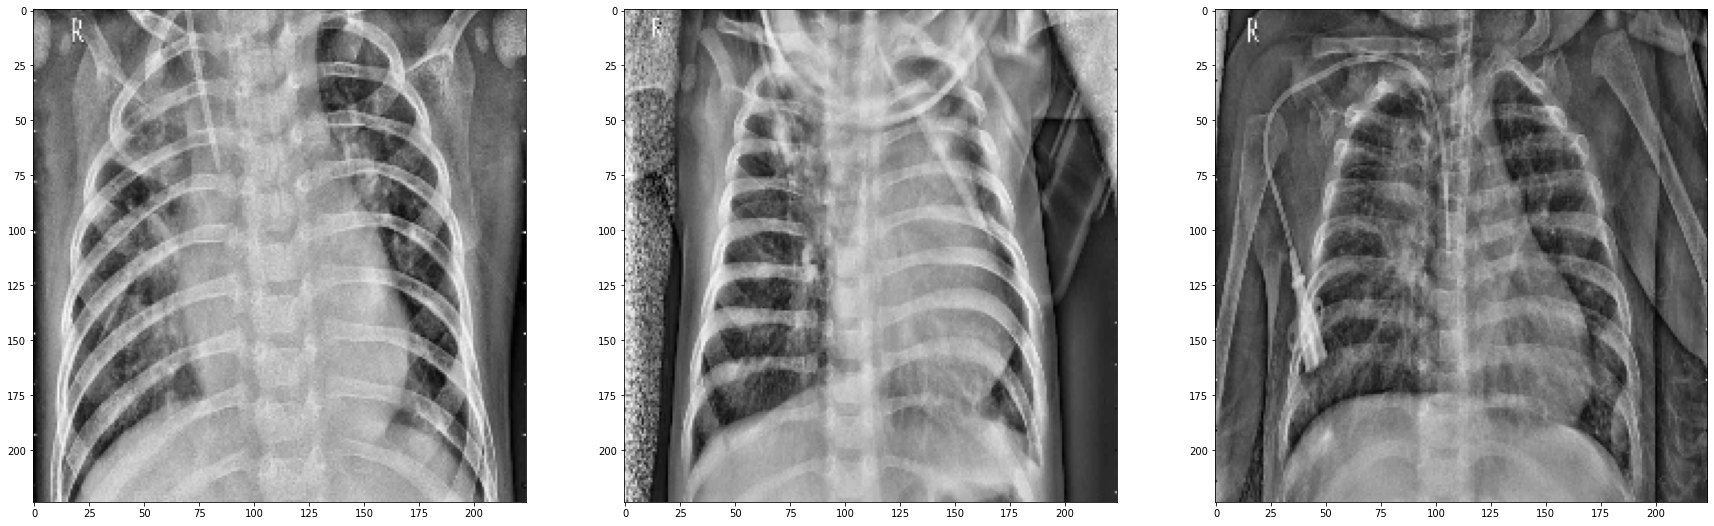

In [ ]:
from skimage import exposure
from glob import glob

start = 0   # Starting index of images
num_img = 3 # Total number of images to show
other_dir = '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_clahe/Pneumonia'

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(16, 16))

fig, ax = plt.subplots(nrows=1, ncols=num_img, figsize=(num_img*10,10))
for q, file_path in enumerate(glob('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input/Pneumonia/*.jpeg')[start:start+num_img]):
    src_img = cv2.imread(file_path,0)
    img_clahe = clahe.apply(src_img)
    img_resize = cv2.resize(img_clahe,(224,224))

    img_clahe = cv2.cvtColor(img_resize, cv2.COLOR_GRAY2RGB )

    # cv2.imwrite(f'{other_dir}/clahe_Pneumonia_{q}.jpg',img_clahe)
    
    ax[q].imshow(img_clahe)

In [ ]:
df = pd.DataFrame(columns =['class', 'directory'])  
for path, names, filenames in os.walk('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_clahe/Normal'):
    for filename in filenames:
        df.loc[-1] = ["Normal", ('Normal/' + filename)] 
        df.index = df.index + 1 
        df = df.sort_index() 
for path, names, filenames in os.walk('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_clahe/COVID-19'):
    for filename in filenames:
        df.loc[-1] = ["COVID-19", ('COVID-19/' + filename)] 
        df.index = df.index + 1 
        df = df.sort_index() 
for path, names, filenames in os.walk('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_clahe/Pneumonia'):
    for filename in filenames:
        df.loc[-1] = ["Pneumonia", ('Pneumonia/' + filename)] 
        df.index = df.index + 1 
        df = df.sort_index() 

In [ ]:
df

,class,directory
0,Pneumonia,Pneumonia/clahe_Pneumonia_174.jpg
1,Pneumonia,Pneumonia/clahe_Pneumonia_173.jpg
2,Pneumonia,Pneumonia/clahe_Pneumonia_172.jpg
3,Pneumonia,Pneumonia/clahe_Pneumonia_171.jpg
4,Pneumonia,Pneumonia/clahe_Pneumonia_170.jpg
...,...,...
3325,Normal,Normal/clahe_Normal_114.jpg
3326,Normal,Normal/clahe_Normal_113.jpg
3327,Normal,Normal/clahe_Normal_111.jpg
3328,Normal,Normal/clahe_Normal_112.jpg


In [ ]:
df_y = df['class']
df_x = df['directory']

In [ ]:
df_x


0       Pneumonia/clahe_Pneumonia_174.jpg
1       Pneumonia/clahe_Pneumonia_173.jpg
2       Pneumonia/clahe_Pneumonia_172.jpg
3       Pneumonia/clahe_Pneumonia_171.jpg
4       Pneumonia/clahe_Pneumonia_170.jpg
                      ...                
3325          Normal/clahe_Normal_114.jpg
3326          Normal/clahe_Normal_113.jpg
3327          Normal/clahe_Normal_111.jpg
3328          Normal/clahe_Normal_112.jpg
3329          Normal/clahe_Normal_110.jpg
Name: directory, Length: 3330, dtype: object

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

In [ ]:
df_y.value_counts()

Pneumonia    1110
COVID-19     1110
Normal       1110
Name: class, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.10, random_state=7)
# X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, stratify= df_y, test_size=0.20, random_state=7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.111, random_state=7) # 0.125 x 0.8 = 0.1


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Y_test shape: {}".format(Y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("Y_val shape: {}".format(Y_val.shape))

X_train shape: (2664,)
X_test shape: (333,)
Y_train shape: (2664,)
Y_test shape: (333,)
X_val shape: (333,)
Y_val shape: (333,)


In [ ]:
Y_train.value_counts()

COVID-19     904
Pneumonia    893
Normal       867
Name: class, dtype: int64

In [ ]:
Y_test.value_counts()

Pneumonia    118
Normal       117
COVID-19      98
Name: class, dtype: int64

In [ ]:
Y_val.value_counts()

Normal       126
COVID-19     108
Pneumonia     99
Name: class, dtype: int64

In [ ]:
train = pd.concat([X_train, Y_train], axis = 1)
train.head()

,directory,class
1677,COVID-19/clahe_COVID-19_717.jpg,COVID-19
2469,Normal/clahe_Normal_970.jpg,Normal
2674,Normal/clahe_Normal_770.jpg,Normal
2596,Normal/clahe_Normal_843.jpg,Normal
755,Pneumonia/clahe_Pneumonia_529.jpg,Pneumonia


In [ ]:
test = pd.concat([X_test, Y_test], axis = 1)
test.head()

,directory,class
358,Pneumonia/clahe_Pneumonia_929.jpg,Pneumonia
1852,COVID-19/clahe_COVID-19_542.jpg,COVID-19
2237,Normal/clahe_Normal_92.jpg,Normal
2416,Normal/clahe_Normal_1023.jpg,Normal
739,Pneumonia/clahe_Pneumonia_544.jpg,Pneumonia


In [ ]:
val = pd.concat([X_val, Y_val], axis = 1)
val.head()

,directory,class
3201,Normal/clahe_Normal_238.jpg,Normal
368,Pneumonia/clahe_Pneumonia_719.jpg,Pneumonia
1336,COVID-19/clahe_COVID-19_1058.jpg,COVID-19
50,Pneumonia/clahe_Pneumonia_124.jpg,Pneumonia
2316,Normal/clahe_Normal_11.jpg,Normal


In [ ]:
def copy_images(df, directory):
    input_path = "/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/input_clahe"
    output_path = "/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/" + directory 
    
    #if any old file exists in ouput path, it is removed
    if os.path.exists(output_path):
        shutil.rmtree(output_path)
        
    #creating folder inside output path
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    #these three subfolders
    classes = ['Normal', 'COVID-19', 'Pneumonia']
    for c in classes:
        if not os.path.exists(output_path + '/' + c):
            os.makedirs(output_path + '/' + c)
    
    #the original dataframe containing directory for each row, those directory are shifted from path_from to path_to
    #(that is from input directory to ouput directory)
    for i, row in df.iterrows():
        path_from = "{}/{}".format(input_path, row['directory'])
        path_to = "{}/{}".format(output_path, row['directory'])
        shutil.copy(path_from, path_to)

In [ ]:
# copy_image function was created to move the test images from input to output directory
# copy_images(test, 'test')

In [ ]:
# copy_images(val, 'val')

In [ ]:
# copy_images(train, 'train')

In [ ]:
!ls '/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/test'

COVID-19  Normal  Pneumonia


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/test/Normal')))
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/test/COVID-19')))
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/test/Pneumonia')))

117
98
118


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/train/Normal')))
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/train/COVID-19')))
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/train/Pneumonia')))

867
904
893


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/val/Normal')))
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/val/COVID-19')))
print(len(os.listdir('/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/val/Pneumonia')))

159
142
132


# **Normalizing the data**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
class_to_label_map = {'Pneumonia' : 2, 'COVID-19' : 1, 'Normal' : 0}

In [ ]:
def convolutional_block(x, filter):
    
    # copy tensor to variable called x_skip
    x_skip = x
    
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

def identity_block(x, filter):
    
    # copy tensor to variable called x_skip
    x_skip = x
    
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

In [ ]:
def ResNet34(shape = (224, 224, 3), classes = 3):
  
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
          
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

model = ResNet34()

In [ ]:
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 115, 115, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

# Training the Model

In [ ]:
opt = RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
test_generator = test_datagen.flow_from_directory(
    # directory=r"/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/test/",
    directory=r"/content/drive/MyDrive/DatasetsTA/3-Third-try/Dataset-COVID19-Normal-Pneumonia/test_output_clahe/test/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=False,
    seed=42
    )
train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )
valid_generator = val_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/DatasetsTA/4-Fourth-try/ChestXRay_COVID-19_Normal_Pneumonia/output_clahe/val/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )

Found 233 images belonging to 3 classes.
Found 2664 images belonging to 3 classes.
Found 433 images belonging to 3 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/percobaanResNet34_CLAHE_RMSprop_0.0001.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

In [ ]:
history = model.fit_generator(
                generator=train_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                validation_data=valid_generator,
                validation_steps=valid_generator.n//valid_generator.batch_size,
                epochs=50,
                callbacks=[es,checkpoint],
                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
166/166 [==============================] - ETA: 0s - loss: 1.3321 - accuracy: 0.7881
Epoch 1: val_accuracy improved from -inf to 0.32639, saving model to /content/drive/MyDrive/Colab Notebooks/percobaanResNet34_CLAHE_RMSprop_0.0001.h5
166/166 [==============================] - 74s 352ms/step - loss: 1.3321 - accuracy: 0.7881 - val_loss: 4.7476 - val_accuracy: 0.3264
Epoch 2/50
166/166 [==============================] - ETA: 0s - loss: 0.3651 - accuracy: 0.9041
Epoch 2: val_accuracy improved from 0.32639 to 0.46528, saving model to /content/drive/MyDrive/Colab Notebooks/percobaanResNet34_CLAHE_RMSprop_0.0001.h5
166/166 [==============================] - 59s 354ms/step - loss: 0.3651 - accuracy: 0.9041 - val_loss: 3.3127 - val_accuracy: 0.4653
Epoch 3/50
166/166 [==============================] - ETA: 0s - loss: 0.2421 - accuracy: 0.9275
Epoch 3: val_accuracy improved from 0.46528 to 0.85880, saving model to /content/drive/MyDrive/Colab Notebooks/percobaanResNet34_CLAHE_RMSpro

# Analysis after Model Training

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0, 0.5, 'Accuracy')

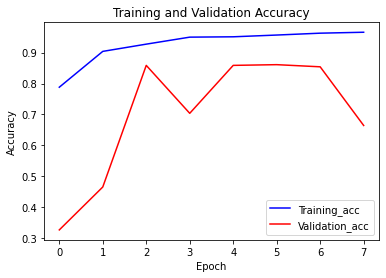

In [ ]:
plt.plot(epochs, acc, label='Training_acc',color='blue')
plt.plot(epochs, val_acc, label='Validation_acc',color='red')
plt.legend(loc = 'best')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

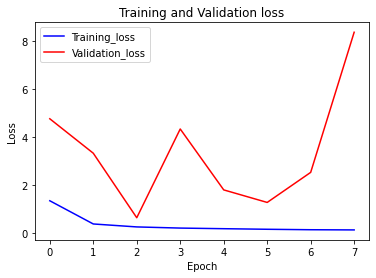

In [ ]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend(loc = 'best')
plt.title("Training and Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

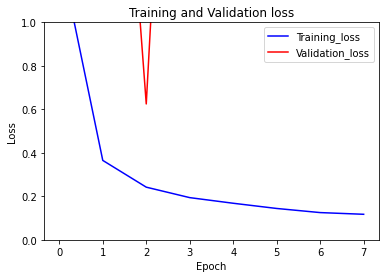

In [ ]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend(loc = 'best')
plt.title("Training and Validation loss")
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
loaded_model =  tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/percobaanResNet34_CLAHE_RMSprop_0.0001.h5')

In [ ]:
loaded_model.optimizer

In [ ]:
for i in range(1, 11):
  evaluate = loaded_model.evaluate(test_generator, steps = test_generator.n // test_generator.batch_size, verbose =1)
  print('Accuracy Test : {}'.format(evaluate[1]))

14/14 [==============================] - 2s 86ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 82ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 80ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 81ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 80ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 85ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 80ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 80ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [==============================] - 1s 86ms/step - loss: 3.1618 - accuracy: 0.7500
Accuracy Test : 0.75
14/14 [============

# Predictions

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['Normal', 'COVID-19','Pneumonia']
label_names = [0,1,2]

In [ ]:
Y_pred = model.predict_generator(test_generator) # Ganti dengan test generator
y_pred = np.argmax(Y_pred ,  axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred, labels = label_names)

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Confusion Matrix
[[80  0 14]
 [40 12 17]
 [ 2  6 62]]


In [ ]:
print('classification_Report')
print(classification_report(test_generator.classes, y_pred, target_names=class_to_label_map))

classification_Report
              precision    recall  f1-score   support

   Pneumonia       0.66      0.85      0.74        94
    COVID-19       0.67      0.17      0.28        69
      Normal       0.67      0.89      0.76        70

    accuracy                           0.66       233
   macro avg       0.66      0.64      0.59       233
weighted avg       0.66      0.66      0.61       233



Confusion Matrix


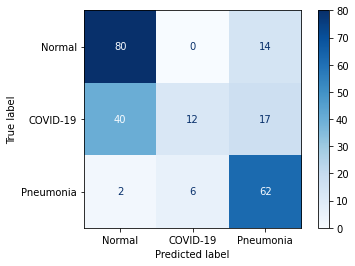

In [ ]:
print('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/ResNet34_CLAHE_RMSprop_0.0001.h5')